This notebook contains the code for generating final charts and tables for experiments

1 - Single run with 10.000 FM passes for all algorithms

2 - 25 runs with fixed CPU time of 450 seconds each for all algorithms.

In [1]:
import utils
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import ils_adaptive as ila

ILS ada results

Minimum best cut size: 3
Mean best cut size: 10.12


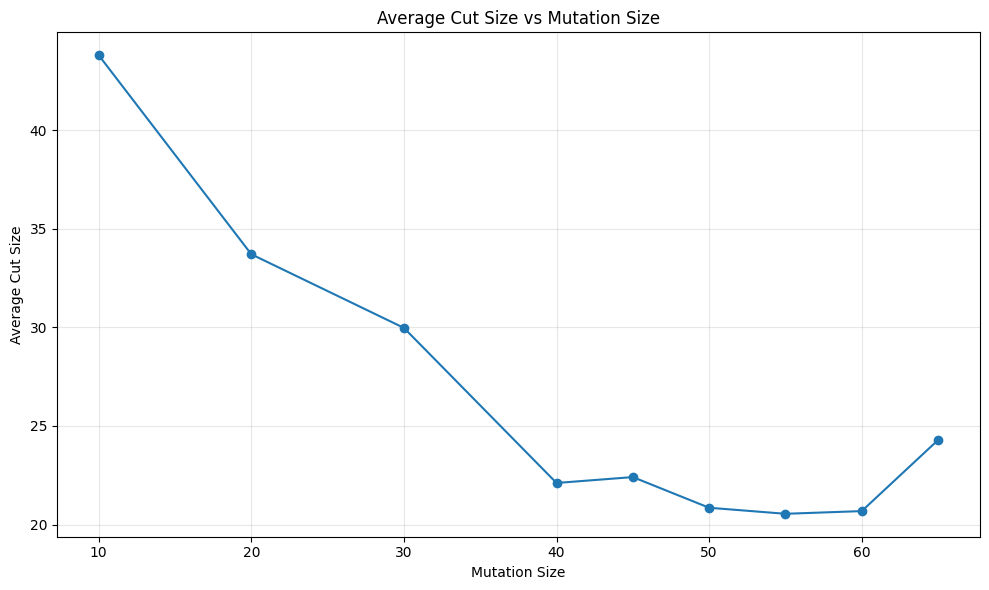

In [ ]:
ils_ada_folder = "pckl/final_results/ils-ada-25"

#load the ILS-ADA results
ilsa_data = ila._load_results_from_folder(ils_ada_folder)
#ilsa_data = ilsa_data[:-1] #drop the last row which is a summary
rows = []
mutation_sizes = []
cuts = []
best_cut_sizes = []
n_stays_in_local_optima = []
for i in range(len(ilsa_data)):
    rows.append(ilsa_data[i][0])
    mutation_sizes.append(ilsa_data[i][1])
    cuts.append(ilsa_data[i][2])
    best_cut_sizes.append(ilsa_data[i][0]["best_cut_size"])
    n_stays_in_local_optima.append(ilsa_data[i][0]["n_stays_in_local_optimum"])
ils_ada = pd.DataFrame(rows)

#{'p_min': 0.0001, 'alpha': 0.4, 'beta': 0.2, 'use_stage_weights': False}
cut_sizes_ils_ada = list(ils_ada['best_cut_size'])
pass
# Calculate min and mean of best cut sizes
min_cut_size = min(cut_sizes_ils_ada)
mean_cut_size = np.mean(cut_sizes_ils_ada)

#LLM Prompt: mutation_sizes is an list of list[int]. cut_sizes is a list of list[int] with same shape. 
# Draw a plot where x-axis shows individual mutation sizes, y-axis is the average of corresponding cut_sizes.
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Group cut sizes by mutation size
mutation_to_cuts = defaultdict(list)
for i in range(len(mutation_sizes)):
    for j in range(len(mutation_sizes[i])):
        mutation_size = mutation_sizes[i][j]
        cut_size = cuts[i][j]
        mutation_to_cuts[mutation_size].append(cut_size)

# Calculate average cut size for each mutation size
avg_cut_sizes = []
unique_mutation_sizes = []

for mutation_size in sorted(mutation_to_cuts.keys()):
    unique_mutation_sizes.append(mutation_size)
    avg_cut_sizes.append(np.mean(mutation_to_cuts[mutation_size]))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(unique_mutation_sizes, avg_cut_sizes, marker='o', linestyle='-')
plt.xlabel('Mutation Size')
plt.ylabel('Average Cut Size')
plt.title('Average Cut Size vs Mutation Size')
plt.grid(True, alpha=0.3)
plt.tight_layout()

print(f"Minimum best cut size: {min_cut_size}")
print(f"Mean best cut size: {mean_cut_size}")



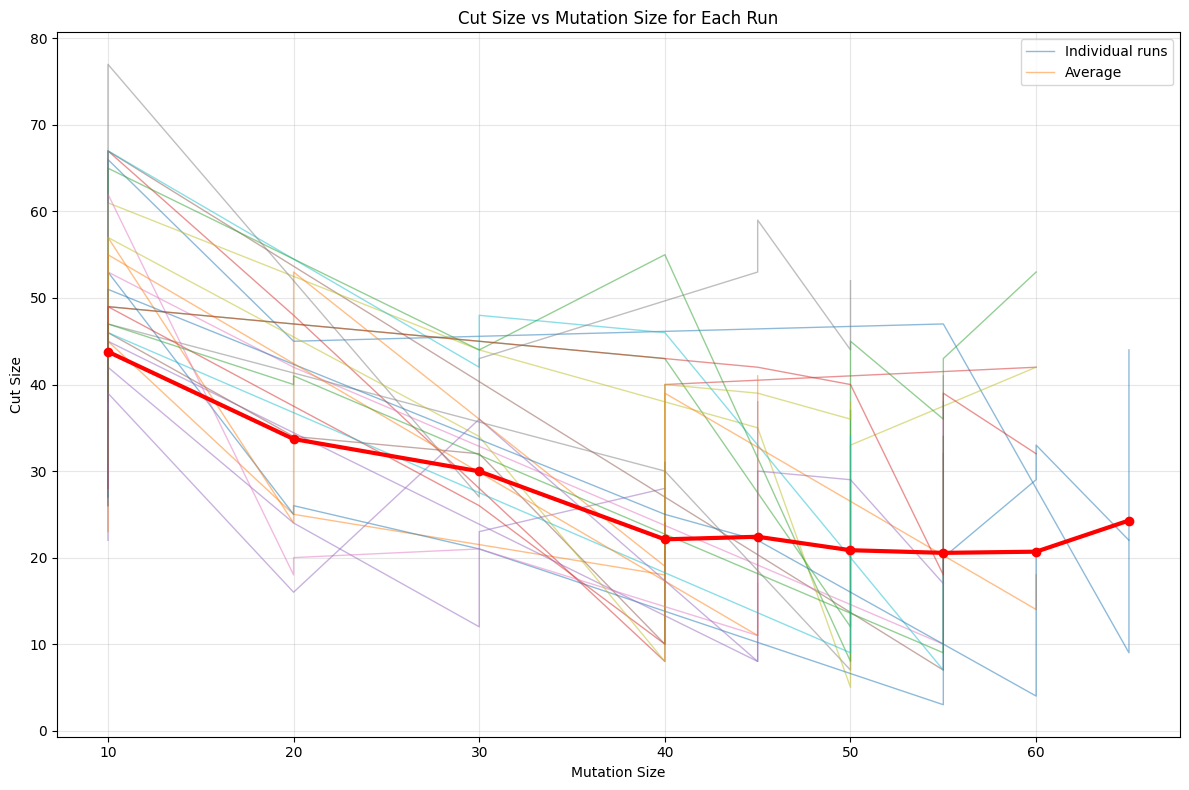

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

# Plot a separate line for each item in cut_sizes
for i in range(len(cuts)):
    mutation_size_values = mutation_sizes[i]
    cut_size_values = cuts[i]
    
    # Sort both lists together based on mutation_size_values
    sorted_pairs = sorted(zip(mutation_size_values, cut_size_values))
    sorted_mutation_sizes, sorted_cut_sizes = zip(*sorted_pairs) if sorted_pairs else ([], [])
    
    # Plot with a different color and a light opacity
    plt.plot(sorted_mutation_sizes, sorted_cut_sizes, alpha=0.5, label=f'Run {i+1}', linewidth=1)

# Add a thicker line for the average (using the previously calculated values)
plt.plot(unique_mutation_sizes, avg_cut_sizes, color='red', linewidth=3, label='Average', marker='o')

plt.xlabel('Mutation Size')
plt.ylabel('Cut Size')
plt.title('Cut Size vs Mutation Size for Each Run')
plt.grid(True, alpha=0.3)

# If there are too many runs, don't show all legends
if len(cuts) > 10:
    plt.legend(['Individual runs', 'Average'], loc='best')
else:
    plt.legend(loc='best')

plt.tight_layout()